In [29]:
import glob
import torch
from torch.utils import data
from PIL import Image
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt

#通过创建data.Dataset子类Mydataset来创建输入
class Mydataset(data.Dataset):
# 类初始化
    def __init__(self, root):
        self.imgs_path = root
# 进行切片
    def __getitem__(self, index):
        img_path = self.imgs_path[index]
        return img_path
# 返回长度
    def __len__(self):
        return len(self.imgs_path)



60
60
['/home/lyc/doc/AML_LAB/img_data/True_2zimo.png', '/home/lyc/doc/AML_LAB/img_data/False_9che.png', '/home/lyc/doc/AML_LAB/img_data/False_8che.png']
['/home/lyc/doc/AML_LAB/img_data/True_3xizhi.png', '/home/lyc/doc/AML_LAB/img_data/True_5zimo.png', '/home/lyc/doc/AML_LAB/img_data/True_10xizhi.png', '/home/lyc/doc/AML_LAB/img_data/False_3zimo.png', '/home/lyc/doc/AML_LAB/img_data/True_2che.png']
{'False': 0, 'True': 1}
{0: 'False', 1: 'True'}
torch.Size([10, 3, 240, 320])


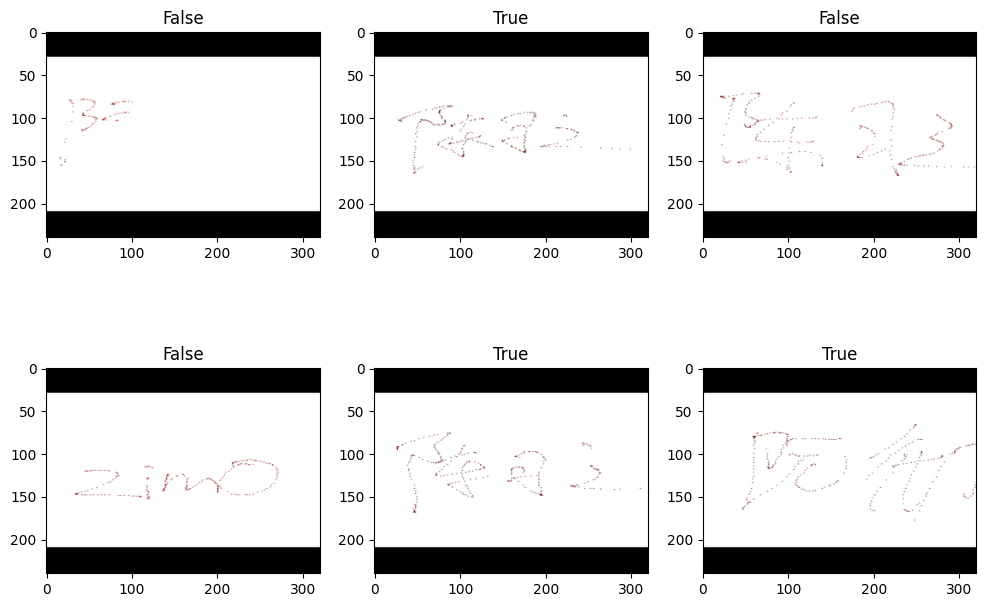

In [31]:
#使用glob方法来获取数据图片的所有路径
all_imgs_path = glob.glob(r'/home/lyc/doc/AML_LAB/img_data/*.png')#数据文件夹路径，根据实际情况更改！
#循环遍历输出列表中的每个元素，显示出每个图片的路径
sample_size=0
for var in all_imgs_path:
    sample_size+=1

print(sample_size)

#利用自定义类Mydataset创建对象weather_dataset
signature_dataset = Mydataset(all_imgs_path)
print(len(signature_dataset)) #返回文件夹中图片总个数
print(signature_dataset[12:15])#切片，显示第12至第十五张图片的路径
sinature_datalodaer = torch.utils.data.DataLoader(signature_dataset, batch_size=5) #每次迭代时返回五个数据
print(next(iter(sinature_datalodaer)))

species = ['False','True']
species_to_id = dict((c, i) for i, c in enumerate(species))
print(species_to_id)
id_to_species = dict((v, k) for k, v in species_to_id.items())
print(id_to_species)
all_labels = []
#对所有图片路径进行迭代
for img in all_imgs_path:
    # 区分出每个img，应该属于什么类别
    for i, c in enumerate(species):
        if c in img:
            all_labels.append(i)
#print(all_labels) #得到所有标签
            

            
# 对数据进行转换处理
transform = transforms.Compose([
                transforms.Resize((240,320)), #做的第一步转换
                transforms.ToTensor() #第二步转换，作用：第一转换成Tensor，第二将图片取值范围转换成0-1之间，第三会将channel置前
])

class Mydatasetpro(data.Dataset):
# 类初始化
    def __init__(self, img_paths, labels, transform):
        self.imgs = img_paths
        self.labels = labels
        self.transforms = transform
# 进行切片
    def __getitem__(self, index):                #根据给出的索引进行切片，并对其进行数据处理转换成Tensor，返回成Tensor
        img = self.imgs[index]
        label = self.labels[index]
        pil_img = Image.open(img)                 #pip install pillow
        data = self.transforms(pil_img)
        return data, label
# 返回长度
    def __len__(self):
        return len(self.imgs)



BATCH_SIZE = 10
signature_dataset = Mydatasetpro(all_imgs_path, all_labels, transform)
sinature_datalodaer = data.DataLoader(
                            signature_dataset,
                            batch_size=BATCH_SIZE,
                            shuffle=True
)

imgs_batch, labels_batch = next(iter(sinature_datalodaer))
print(imgs_batch.shape)

plt.figure(figsize=(12, 8))
for i, (img, label) in enumerate(zip(imgs_batch[:6], labels_batch[:6])):
    img = img.permute(1, 2, 0).numpy()
    plt.subplot(2, 3, i+1)
    plt.title(id_to_species.get(label.item()))
    plt.imshow(img)
plt.show()#展示图片


In [32]:
import pandas as pd 

#划分测试集和训练集
index = np.random.permutation(len(all_imgs_path))

all_imgs_path = np.array(all_imgs_path)[index]
all_labels = np.array(all_labels)[index]

#80% as train
s = int(len(all_imgs_path)*0.7)
print(s)

train_imgs = all_imgs_path[:s]
train_labels = all_labels[:s]
test_imgs = all_imgs_path[s:]
test_labels = all_labels[s:]





print(test_labels)
train_ds = Mydatasetpro(train_imgs, train_labels, transform) #TrainSet TensorData
test_ds = Mydatasetpro(test_imgs, test_labels, transform) #TestSet TensorData

print(train_ds)
train_imgs = pd.get_dummies(train_imgs)
test_imgs = pd.get_dummies(test_imgs)
#print(train_ds)

train_dl = data.DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)#TrainSet Labels
test_dl = data.DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=True)#TestSet Labels






42
[0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0]


## 训练

## Resnet

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18
from torch.utils.data import DataLoader
from torchvision import models
from torchsummary import summary
# 假设您的数据集已经准备好，包括训练集和验证集
# 这里仅作示例，您需要根据实际情况修改数据加载部分




# 初始化ResNet模型
model_resnet = resnet18(pretrained=True)
num_classes = 2
model_resnet.fc = nn.Linear(model.fc.in_features, num_classes)




# 设置优化器和损失函数
optimizer = optim.Adam(model_resnet.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 训练模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_resnet.to(device)

for epoch in range(30):  # 假设训练30个epoch
    model_resnet.train()
    running_loss = 0.0
    for images, labels in train_dl:
        images, labels = images.to(device), labels.to(device)  # 将图像和标签分别移动到设备上
        optimizer.zero_grad()
        outputs = model_resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/30], Loss: {running_loss / len(train_dl)}")



summary(model_resnet, input_size=(3,256,256), batch_size=-1, device='cuda')
# 验证模型


model_resnet.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dl:
        images, labels = images.to(device), labels.to(device)  # 将图像和标签分别移动到设备上
        outputs = model_resnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total:.2f}%")


Epoch [1/30], Loss: 0.9169772922992706
Epoch [2/30], Loss: 0.7375412166118622
Epoch [3/30], Loss: 0.44340081214904786
Epoch [4/30], Loss: 0.547293895483017
Epoch [5/30], Loss: 0.5328037232160568
Epoch [6/30], Loss: 0.35130917727947236
Epoch [7/30], Loss: 0.2799738049507141
Epoch [8/30], Loss: 0.38545175828039646
Epoch [9/30], Loss: 0.2093379244208336
Epoch [10/30], Loss: 0.2807220906019211
Epoch [11/30], Loss: 0.2149545781314373
Epoch [12/30], Loss: 0.30852140188217164
Epoch [13/30], Loss: 0.28187903501093386
Epoch [14/30], Loss: 0.162355834338814
Epoch [15/30], Loss: 0.2335238866508007
Epoch [16/30], Loss: 0.5622316082939506
Epoch [17/30], Loss: 0.2717699810862541
Epoch [18/30], Loss: 0.29177558422088623
Epoch [19/30], Loss: 0.2762813001871109
Epoch [20/30], Loss: 0.08629057072103023
Epoch [21/30], Loss: 0.47318200170993807
Epoch [22/30], Loss: 0.10659525254741312
Epoch [23/30], Loss: 0.40150755904614926
Epoch [24/30], Loss: 0.0669550847262144
Epoch [25/30], Loss: 0.05233116932213307


## VGG16

In [35]:
from torchvision.models import vgg16  # 更改这里导入VGG模型

model_vgg = vgg16(pretrained=True)
num_classes = 2
# VGG的分类器是一个Sequential模块，最后一层是一个全连接层
model_vgg.classifier[6] = nn.Linear(model_vgg.classifier[6].in_features, num_classes)  # 修改VGG最后的全连接层

# 设置优化器和损失函数
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 训练模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_vgg.to(device)

for epoch in range(30):  # 假设训练30个epoch
    model_vgg.train()
    running_loss = 0.0
    for images, labels in train_dl:  # 确保train_dl是你的训练数据加载器
        images, labels = images.to(device), labels.to(device)  # 将图像和标签分别移动到设备上
        optimizer.zero_grad()
        outputs = model_vgg(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/30], Loss: {running_loss / len(train_dl)}")

# 模型摘要
summary(model_vgg, input_size=(3, 256, 256), batch_size=-1, device='cuda')

# 验证模型
model_vgg.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dl:  # 确保test_dl是你的测试数据加载器
        images, labels = images.to(device), labels.to(device)
        outputs = model_vgg(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

/home/lyc/anaconda3/envs/mix/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.6671177506446838
Epoch [2/30], Loss: 0.6962469220161438
Epoch [3/30], Loss: 0.7337760090827942
Epoch [4/30], Loss: 0.6853781759738922
Epoch [5/30], Loss: 0.6747830867767334
Epoch [6/30], Loss: 0.7155906677246093
Epoch [7/30], Loss: 0.7731550693511963
Epoch [8/30], Loss: 0.7879877686500549
Epoch [9/30], Loss: 0.7017155170440674
Epoch [10/30], Loss: 0.7624233841896058
Epoch [11/30], Loss: 0.6926549553871155
Epoch [12/30], Loss: 0.7050369143486023
Epoch [13/30], Loss: 0.7888606667518616
Epoch [14/30], Loss: 0.6969547867774963
Epoch [15/30], Loss: 0.6862338423728943
Epoch [16/30], Loss: 0.7132361173629761
Epoch [17/30], Loss: 0.7472813963890076
Epoch [18/30], Loss: 0.7400661468505859
Epoch [19/30], Loss: 0.7868106245994568
Epoch [20/30], Loss: 0.689647102355957
Epoch [21/30], Loss: 0.8420855641365051
Epoch [22/30], Loss: 0.6539978504180908
Epoch [23/30], Loss: 0.7102502107620239
Epoch [24/30], Loss: 0.7314060449600219
Epoch [25/30], Loss: 0.7323890805244446
Epoch [26/

In [37]:
from torchvision import models

model_alex = models.alexnet(pretrained=True)
num_classes = 2
# VGG的分类器是一个Sequential模块，最后一层是一个全连接层
model_vgg.classifier[6] = nn.Linear(model_vgg.classifier[6].in_features, num_classes)  # 修改VGG最后的全连接层

# 设置优化器和损失函数
optimizer = optim.Adam(model_alex.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 训练模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_alex.to(device)

for epoch in range(30):  # 假设训练30个epoch
    model_alex.train()
    running_loss = 0.0
    for images, labels in train_dl:  # 确保train_dl是你的训练数据加载器
        images, labels = images.to(device), labels.to(device)  # 将图像和标签分别移动到设备上
        optimizer.zero_grad()
        outputs = model_alex(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/30], Loss: {running_loss / len(train_dl)}")

# 模型摘要
summary(model_alex, input_size=(3, 256, 256), batch_size=-1, device='cuda')

# 验证模型
model_alex.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dl:  # 确保test_dl是你的测试数据加载器
        images, labels = images.to(device), labels.to(device)
        outputs = model_alex(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

/home/lyc/anaconda3/envs/mix/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 7.819986343383789
Epoch [2/30], Loss: 0.862075617723167
Epoch [3/30], Loss: 4.656024503707886
Epoch [4/30], Loss: 1.0019102811813354
Epoch [5/30], Loss: 1.6665412664413453
Epoch [6/30], Loss: 0.8063151359558105
Epoch [7/30], Loss: 1.1205496311187744
Epoch [8/30], Loss: 0.9714620351791382
Epoch [9/30], Loss: 0.7473127722740174
Epoch [10/30], Loss: 0.7418789386749267
Epoch [11/30], Loss: 0.704882538318634
Epoch [12/30], Loss: 0.7604654788970947
Epoch [13/30], Loss: 0.7046707391738891
Epoch [14/30], Loss: 0.7513233304023743
Epoch [15/30], Loss: 0.6983481526374817
Epoch [16/30], Loss: 0.6987439632415772
Epoch [17/30], Loss: 0.7114803075790406
Epoch [18/30], Loss: 0.7306803822517395
Epoch [19/30], Loss: 0.7126360893249511
Epoch [20/30], Loss: 0.658201938867569
Epoch [21/30], Loss: 0.7447127938270569
Epoch [22/30], Loss: 0.6904415845870971
Epoch [23/30], Loss: 0.7289310693740845
Epoch [24/30], Loss: 0.6896836876869201
Epoch [25/30], Loss: 0.696816372871399
Epoch [26/30], 

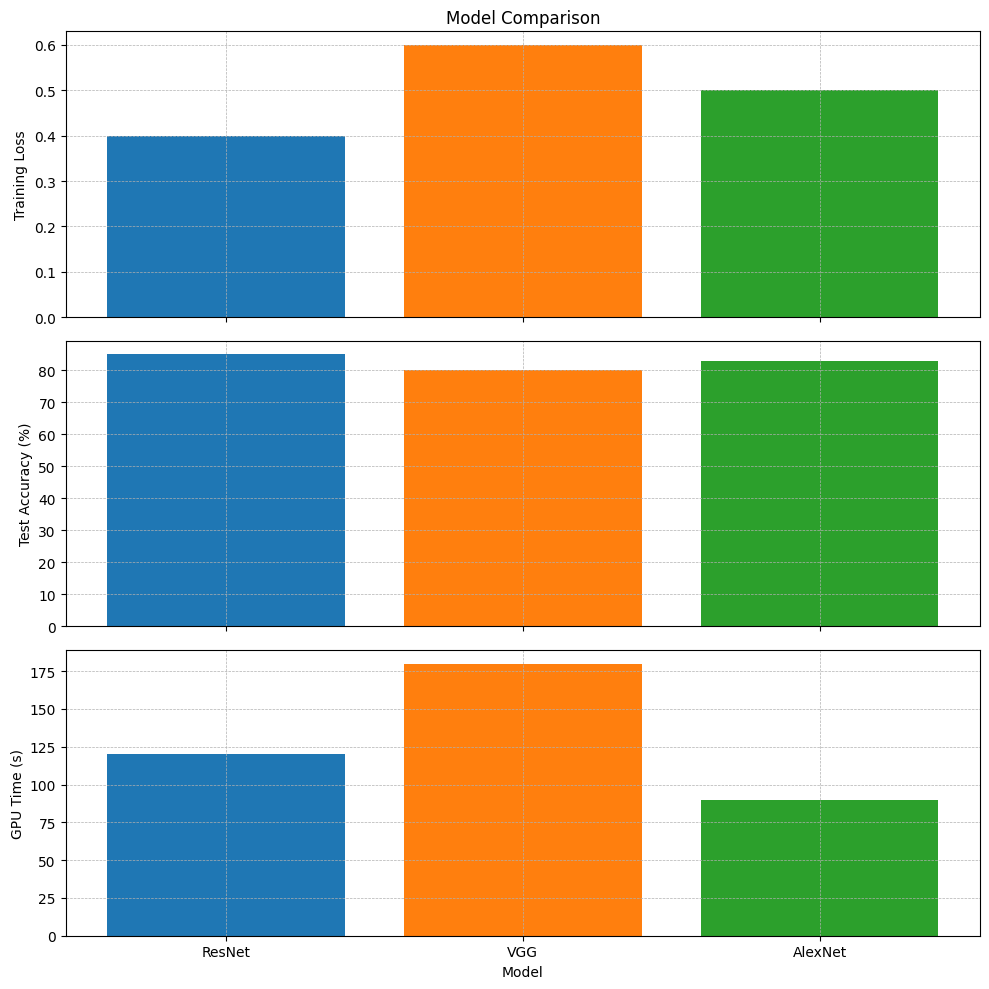

In [36]:
import matplotlib.pyplot as plt

# 假设数据
models = ['ResNet', 'VGG', 'AlexNet']
training_losses = [0.4, 0.6, 0.5]  # 每个模型的训练损失
test_accuracies = [85, 80, 83]  # 每个模型的测试准确率
gpu_times = [120, 180, 90]  # 每个模型的GPU时间（秒）

# 设定颜色方案
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# 绘制训练损失图
axs[0].bar(models, training_losses, color=colors)
axs[0].set_ylabel('Training Loss')
axs[0].set_title('Model Comparison')
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# 绘制测试准确率图
axs[1].bar(models, test_accuracies, color=colors)
axs[1].set_ylabel('Test Accuracy (%)')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# 绘制GPU时间图
axs[2].bar(models, gpu_times, color=colors)
axs[2].set_ylabel('GPU Time (s)')
axs[2].set_xlabel('Model')
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# 调整子图布局
plt.tight_layout()

plt.show()
